## Characteristics

Scalar_XYZ is a set of two modules for:

* Generation of 3D masks and diffractive optical elements.
* Propagation of light, determination of parameters, and other functions.
* Drawing sources, masks and fields

For light generation, scalar_sources_XY.py is used.

**Warning**: This module is not very mature yet.

These modules are named: scalar_fields_XYZ.py,and scalar_masks_XYZ.py.

Each module present a main class:

* Scalar_field_XYZ
* Scalar_masks_XYZ

The main attributes for these classes are the following:

* self.x (numpy.array): linear array with equidistant positions. The number of data is preferibly 
$2^n$ .
* self.y (numpy.array): linear array with equidistant positions. The number of data is preferibly 
$2^n$ .
* self.z (numpy.array): linear array with equidistant positions. The number of data is preferibly 
$2^n$ .
* self.wavelength (float): wavelength of the incident field.
* self.u (numpy.array): equal size than x * y * z. complex field.


We can also find these atributes:

* self.X (numpy.array): linear 2D array with size x * y * z storing X position.
* self.Y (numpy.array): linear 2D array with size x * y * z storing Y position.
* self.Z (numpy.array): linear 2D array with size x * y * z storing Z position.
* self.quality (float): quality of RS algorithm. Valid for values > 1.
* self.info (str): description of data.
* self.fast (bool): If True, Rayleigh-Sommerfeld computations are performed using Fresnel approximation.
* self.type (str): Class of the field.
* self.date (str): date when performed.

The dimensional magnitudes are related to microns: `micron = 1.`

In [1]:
# configuration
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [2]:
from diffractio import degrees, eps, mm, no_date, np, plt, um
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_masks_XYZ import Scalar_mask_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY

number of processors: 8


In [3]:
from matplotlib import rcParams
rcParams['figure.figsize']=[8,8]
rcParams['figure.dpi']=100

### save_load

In [4]:
length = 100 * um
numdata = 16  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um
filename='save_load_xyz.hkl'

t1 = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)

t1.u = np.ones_like(t1.u)
t1.save_data(filename=filename, method='hickle', add_name='')

/home/luismiguel/.local/lib/python3.6/site-packages/hickle/hickle.py:403: SerializedWarning: <class 'diffractio.scalar_fields_XY.Scalar_field_XY'> type not understood, data have been serialized
  SerializedWarning)


True

In [5]:

t2 = Scalar_field_XYZ(x=None, y=None, z=None, wavelength=None)
t2.load_data(
    filename=filename, method='hickle', verbose=False);

### clear_field

In [6]:
length = 100 * um
numdata = 32  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(-length / 2, length / 2, numdata)
wavelength = 0.5 * um

u0 = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
u0.u = np.ones_like(u0.u)
print(u0.u.max())

u0.clear_field()
print(u0.u.max())

(1+0j)
0j


### show_index_refraccion

In [7]:
length=150*um

x0 = np.linspace(-length / 2, length / 2, 128)
y0 = np.linspace(-length / 2, length / 2, 128)
z0 = np.linspace(-length / 2, length / 2, 128)
wavelength = 0.55 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(20 * um, 20 * um), angle=0 * degrees)

uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1., info='')
uxyz.incident_field(t1)
uxyz.cylinder(
    r0=(0 * um, 0 * um, 0),
    radius=(20 * um, 20 * um),
    length=75*um,
    refraction_index=1.5,
    eje=(0, 0, 0),
    angle=0 * degrees)

uxyz.draw_refraction_index3D()

close the window to continue
vea y cierre la ventana abierta para continuar


![title](refraction_index.png)

### RS propagation of a circular aperture

In [8]:
length = 100 * um
numdata = 128  
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(200*um, 2*mm, 128)
wavelength = 0.5 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0, 0), z0=0, w0=(150 * um, 150 * um))

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(r0=(0,0), radius=(25*um,25*um))
t3 = u1 * t1

In [9]:
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS()
uxyz.draw_intensityXYZ(logarithm=False, normalize='maximum')

time in RS= 6.053348541259766. num proc= 4
vea y cierre la ventana abierta para continuar


![title](RS_circle.png)

### Rayleigh-Sommerfeld propagation of a gauss beam passing through a Grating

In [10]:
length = 500 * um
x0 = np.linspace(-length / 2, length / 2, 128)
y0 = np.linspace(-length / 2, length / 2, 128)
z0 = np.linspace(2 * mm, 7 * mm, 128)
wavelength = 0.6328 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0, 0), z0=0, w0=(150 * um, 150 * um))

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.ronchi_grating(period=20 * um, x0=0 * um, angle=0 * degrees)
t2 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t2.lens(
    r0=(0 * um, 0 * um),
    radius=(200 * um, 200 * um),
    focal=(5 * mm, 5 * mm),
    angle=0 * degrees)

t3 = u1 * t1 * t2

In [11]:
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS();

time in RS= 5.738435983657837. num proc= 4


5.738435983657837

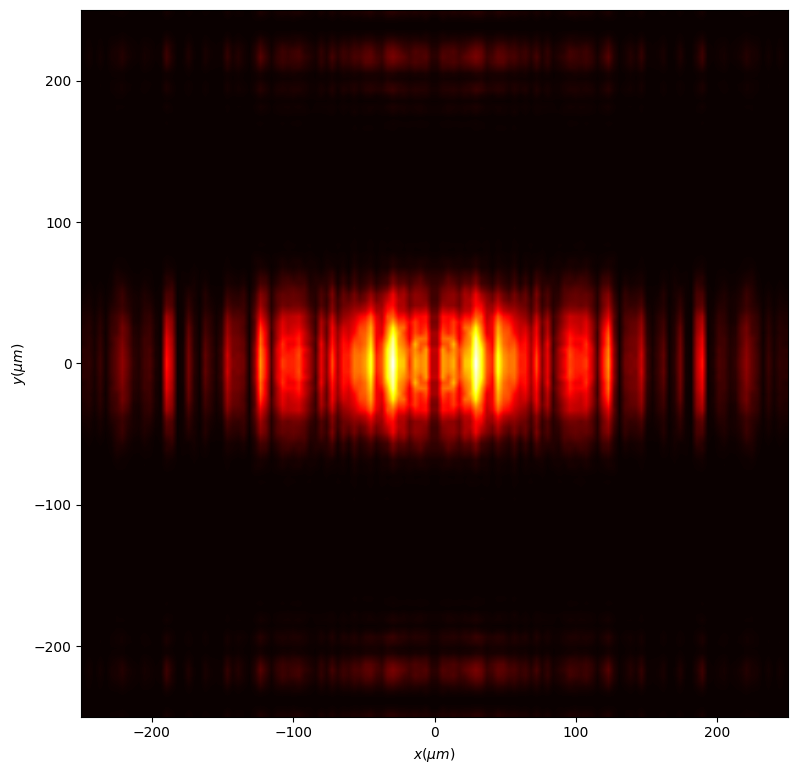

In [12]:
uxyz.draw_intensityXY(z0=3 * mm)

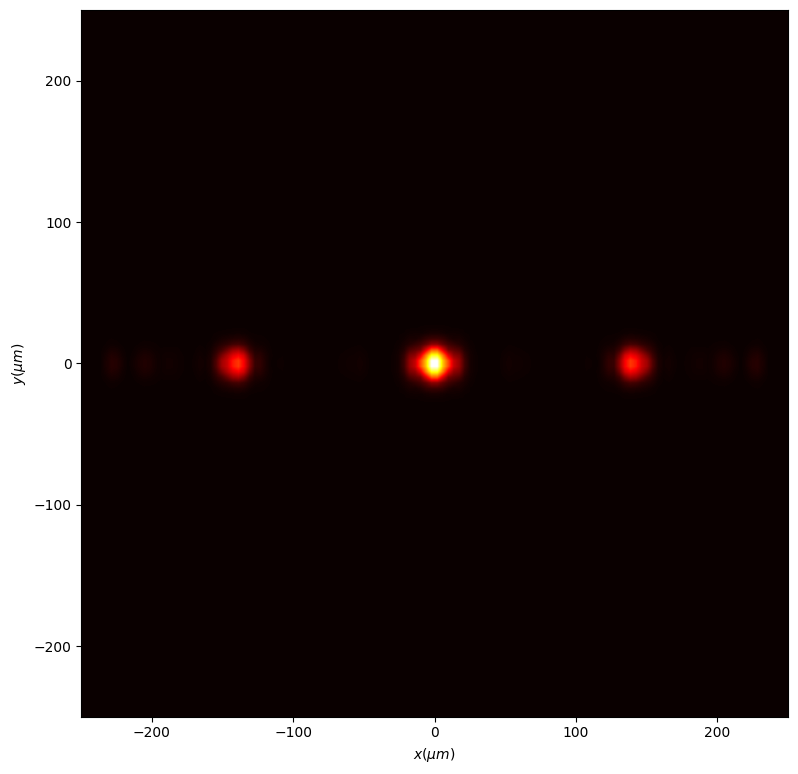

In [13]:
uxyz.draw_intensityXY(z0=4.5 * mm)

A particular plane, can be passed to scalar_field_XY, and then, it can be drawn.

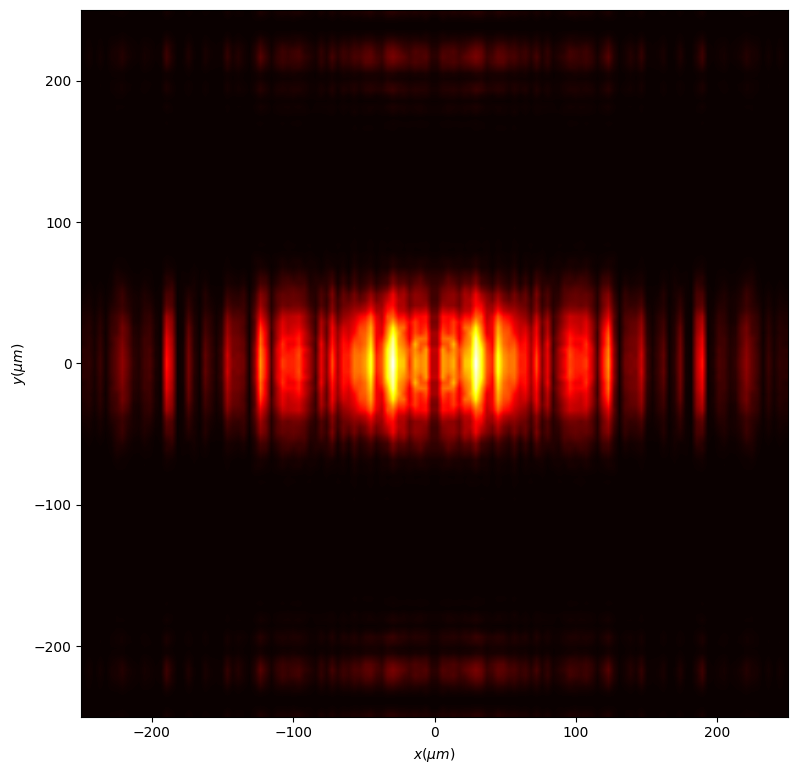

In [14]:
u_xy = uxyz.to_scalar_field_XY(z0=3 * mm, is_class=True, matrix=False)
u_xy.draw(kind='intensity');

Also, the intensity at the XZ plane can be obtained.

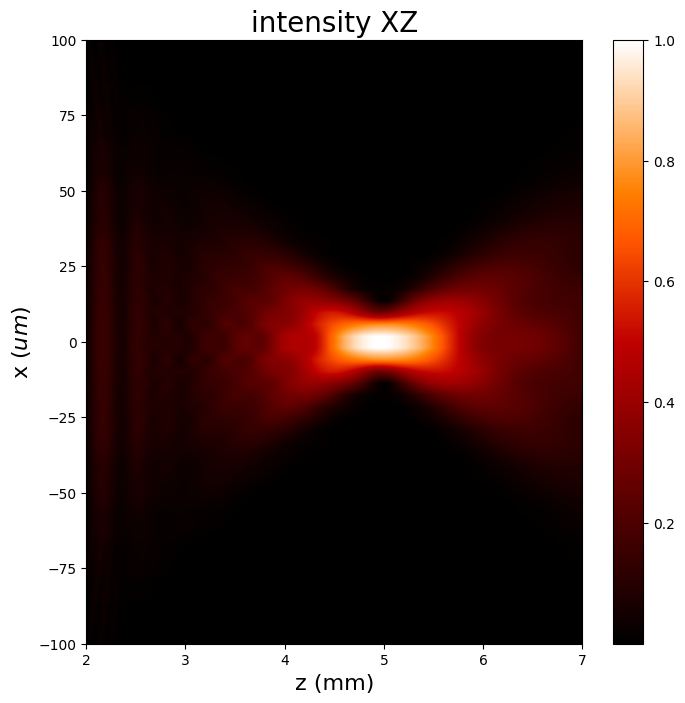

In [15]:
uxyz.draw_intensityXZ(y0=0 * mm, logarithm=True)
plt.ylim(-100,100);

In [7]:
uxyz.draw_intensityXYZ(logarithm=False, normalize='maximum')

vea y cierre la ventana abierta para continuar


![title](talbot.png)

In [20]:
# uxyz.drawVolumen3D(logarithm=1, normalize='maximum', maxintensity=None)

### Video from a XYZ distribution

In [16]:
length = 100 * um
numdata = 128  # 256
x0 = np.linspace(-length / 2, length / 2, numdata)
y0 = np.linspace(-length / 2, length / 2, numdata)
z0 = np.linspace(200*um, 2*mm, 128)
wavelength = 0.5 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(A=1, r0=(0, 0), z0=0, w0=(150 * um, 150 * um))

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(r0=(0,0), radius=(25*um,25*um))
t3 = u1 * t1

In [4]:
uxyz = Scalar_field_XYZ(x=x0, y=y0, z=z0, wavelength=wavelength)
uxyz.incident_field(t3)
uxyz.RS();

time in RS= 5.676227331161499. num proc= 4


In [5]:
filename="video_RS"

In [6]:
uxyz.video(filename=filename + '_int.avi', kind='intensity', frame=False)

In [7]:
uxyz.video(filename=filename + '_phase.mp4', kind='phase', frame=True)

In [8]:
uxyz.video(filename=filename + '_real.mp4', kind='real', frame=True)

In [9]:
from IPython.display import Video
Video(filename+".avi", embed=True)

In [10]:
from IPython.display import HTML

In [12]:
HTML("""
<video width="320" height="240" controls>
  <source src="video_RS3_real.mp4" type="video/mp4">
</video>
""")

### BPM

Beam Propagation Method is alos implemented in this XYZ mode.

In [17]:
x0 = np.linspace(-200*um, 200*um, 128)
y0 = np.linspace(-200*um, 200*um, 128)
z0 = np.linspace(0, 2*mm, 128)

wavelength = 5 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.gauss_beam(
    A=1,
    r0=(0 * um, 0 * um),
    w0=(500*um, 500*um),
    theta=0. * degrees,
    phi=0 * degrees)

In [18]:
uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1., info='')
uxyz.incident_field(u1)
uxyz.sphere(
     r0=(0 * um, 0 * um, 200*um),
     radius=(75*um, 75*um, 75*um),
     refraction_index=8,
     angles=0);

In [19]:
uxyz.draw_refraction_index3D()

close the window to continue
vea y cierre la ventana abierta para continuar


In [20]:
uxyz.BPM()

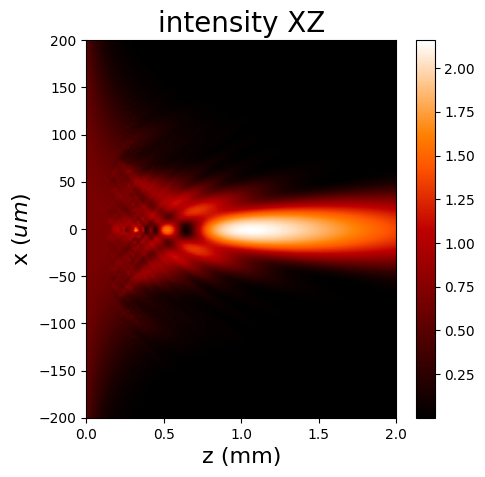

In [21]:
uxyz.draw_intensityXZ(
    y0=0.0, logarithm=True, normalize=False, draw_borders=False)
fig=plt.gcf()
fig.set_size_inches(5, 5, forward=True)

### cut_function

In [22]:
length = 50 * um
numdataX = 256
numdataZ = 128
longitud = 512 * um
radiusFibra = 25 * um
x0 = np.linspace(-length, length, numdataX)
y0 = np.linspace(-length, length, numdataX)
z0 = np.linspace(0, longitud, numdataZ)
wavelength = 0.55 * um

u1 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u1.plane_wave()
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um),
    radius=(radiusFibra, radiusFibra),
    angle=0 * degrees)
u2 = u1 * t1

uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1., info='')
uxyz.incident_field(u2)
uxyz.sphere(
    r0=(0 * um, 0 * um, radiusFibra),
    radius=(radiusFibra, radiusFibra, radiusFibra),
    refraction_index=2,
    angles=(0, 0, 0))

uxyz.draw_refraction_index3D()

close the window to continue
vea y cierre la ventana abierta para continuar


In [23]:
uxyz2=uxyz.cut_resample(z_limits=(0,10*um), new_field=True)

uxyz2.draw_refraction_index3D()

close the window to continue
vea y cierre la ventana abierta para continuar


### benchmark_RS_multiprocessing

In [32]:
x0 = np.linspace(-25 * um, 25 * um, 128)
y0 = np.linspace(-25 * um, 25 * um, 128)
z0 = np.linspace(100 * um, 500 * um, 128)
wavelength = 0.55 * um

t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.circle(
    r0=(0 * um, 0 * um), radius=(20 * um, 20 * um), angle=0 * degrees)

uxyz = Scalar_mask_XYZ(
    x=x0, y=y0, z=z0, wavelength=wavelength, n_background=1., info='')
uxyz.incident_field(t1)
uxyz.sphere(
    r0=(0 * um, 0 * um, 0 * um),
    radius=(10 * um, 30 * um, 50 * um),
    refraction_index=2,
    angles=(0 * degrees, 0 * degrees, 45 * degrees))
uxyz.u0 = t1

In [33]:
time = uxyz.RS(num_processors=1, verbose=False)
print("time in RS_multiprocessing {}: {} seconds".format(1, time))
    

time in RS= 2.4390065670013428. num proc= 1
time in RS_multiprocessing 1: 2.4390065670013428 seconds


In [34]:
time = uxyz.RS(num_processors=4, verbose=False)
print("time in RS_multiprocessing {}: {} seconds".format(4, time))
  

time in RS= 6.6932384967803955. num proc= 4
time in RS_multiprocessing 4: 6.6932384967803955 seconds
